In [25]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
import mplfinance as mpf
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from mplfinance.original_flavor import candlestick_ohlc
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
from finta import TA
import backtrader as bt
from backtesting import Backtest, Strategy
from backtesting.lib import crossover, SignalStrategy, TrailingStrategy

In [26]:
## df = pd.read_csv('data.csv')

df = pd.read_csv('C:/Users/nmsud/OneDrive/Desktop/Capstone/BTC Imputed Data.csv')

In [27]:
import talib
import pandas as pd

# Calculate SMAs using TA-Lib
df['SMA_2'] = talib.SMA(df['close'], timeperiod=2)    # 2-period SMA
df['SMA_5'] = talib.SMA(df['close'], timeperiod=5)    # 5-period SMA
df['SMA_10'] = talib.SMA(df['close'], timeperiod=10)  # 10-period SMA
df['SMA_15'] = talib.SMA(df['close'], timeperiod=15)  # 15-period SMA
df['SMA_20'] = talib.SMA(df['close'], timeperiod=20)  # 20-period SMA
df['SMA_50'] = talib.SMA(df['close'], timeperiod=50)  # 50-period SMA

# Calculate SMAs using TA-Lib
df['EMA_2'] = talib.EMA(df['close'], timeperiod=2)    # 2-period EMA
df['EMA_5'] = talib.EMA(df['close'], timeperiod=5)    # 5-period EMA
df['EMA_10'] = talib.EMA(df['close'], timeperiod=10)  # 10-period EMA
df['EMA_15'] = talib.EMA(df['close'], timeperiod=15)  # 15-period EMA
df['EMA_20'] = talib.EMA(df['close'], timeperiod=20)  # 20-period EMA
df['EMA_50'] = talib.EMA(df['close'], timeperiod=50)  # 50-period EMA

# Display the DataFrame with the moving averages
df.head()


,date,unix,symbol,open,high,low,close,volume,volume_from,marketorder_volume,...,SMA_10,SMA_15,SMA_20,SMA_50,EMA_2,EMA_5,EMA_10,EMA_15,EMA_20,EMA_50
0,5/29/2024 23:04,1717020000000,BTCUSDT,67695.53,67715.60,67695.52,67704.01,17.27975,1.170003e+06,5.71562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5/29/2024 23:05,1717020000000,BTCUSDT,67704.00,67713.99,67704.00,67713.99,3.84207,2.601421e+05,3.43140,...,NaN,NaN,NaN,NaN,67709.000000,NaN,NaN,NaN,NaN,NaN
2,5/29/2024 23:06,1717020000000,BTCUSDT,67713.99,67713.99,67701.55,67710.17,4.65263,3.150293e+05,2.37986,...,NaN,NaN,NaN,NaN,67709.780000,NaN,NaN,NaN,NaN,NaN
3,5/29/2024 23:07,1717020000000,BTCUSDT,67710.17,67710.18,67710.17,67710.18,2.57038,1.740409e+05,0.75446,...,NaN,NaN,NaN,NaN,67710.046667,NaN,NaN,NaN,NaN,NaN
4,5/29/2024 23:08,1717020000000,BTCUSDT,67710.17,67710.18,67683.80,67683.80,5.09510,3.449123e+05,1.48239,...,NaN,NaN,NaN,NaN,67692.548889,67704.43,NaN,NaN,NaN,NaN


In [28]:
df.tail()

,date,unix,symbol,open,high,low,close,volume,volume_from,marketorder_volume,...,SMA_10,SMA_15,SMA_20,SMA_50,EMA_2,EMA_5,EMA_10,EMA_15,EMA_20,EMA_50
135411,9/4/2024 23:55,1725490000000,BTCUSDT,57986.00,57989.00,57976.00,57976.00,3.77362,218811.92540,1.05007,...,57955.900,57971.662667,57999.174,58090.8972,57978.033550,57971.841434,57972.959167,57984.250508,57997.802035,58055.889688
135412,9/4/2024 23:56,1725490000000,BTCUSDT,57976.01,57979.00,57976.00,57978.99,1.95230,113192.15470,1.47057,...,57957.098,57968.866667,57992.423,58087.5570,57978.671183,57974.224289,57974.055682,57983.592945,57996.010412,58052.874014
135413,9/4/2024 23:57,1725490000000,BTCUSDT,57979.00,57979.00,57953.43,57963.00,12.05262,698673.31670,2.26751,...,57956.898,57965.866667,57985.422,58083.8972,57968.223728,57970.482860,57972.045558,57981.018827,57992.866564,58049.349543
135414,9/4/2024 23:58,1725490000000,BTCUSDT,57963.00,57972.75,57963.00,57968.01,5.66783,328561.41420,3.68626,...,57959.600,57964.200667,57978.972,58079.9846,57968.081243,57969.658573,57971.311820,57979.392723,57990.499272,58046.159757
135415,9/4/2024 23:59,1725490000000,BTCUSDT,57968.00,57970.90,57968.00,57970.90,1.00657,58350.44471,0.51428,...,57967.690,57962.260000,57975.142,58075.8824,57969.960414,57970.072382,57971.236944,57978.331133,57988.632674,58043.208394


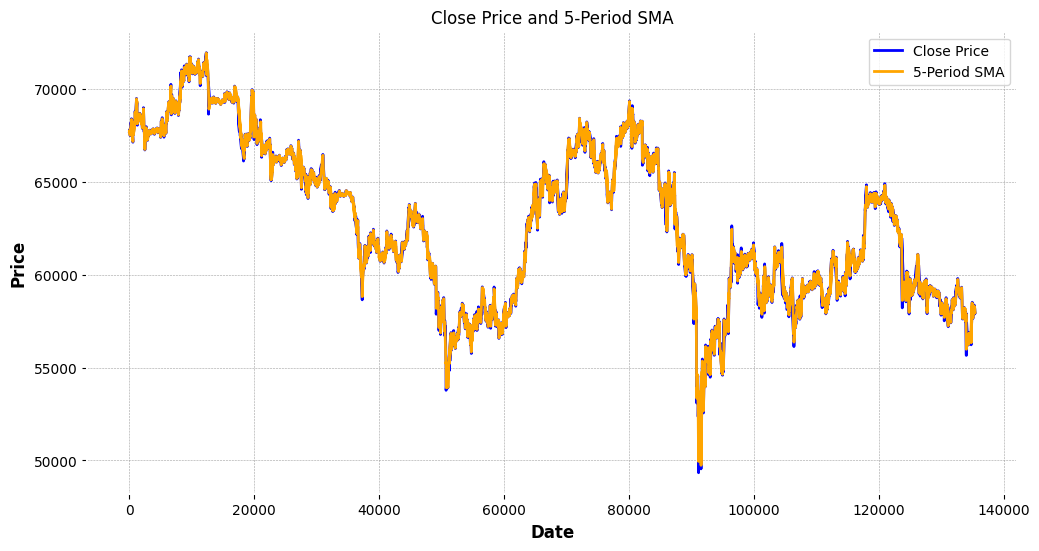

In [29]:
import matplotlib.pyplot as plt
import talib
import pandas as pd

# Calculate 5-period SMA using TA-Lib
df['SMA_5'] = talib.SMA(df['close'], timeperiod=5)

# Plot 'close' price and 'SMA_5'
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Close Price', color='blue')
plt.plot(df['SMA_5'], label='5-Period SMA', color='orange')

# Add labels and legend
plt.title('Close Price and 5-Period SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
df['date'] = pd.to_datetime(df['date'])

# Set 'datetime' as the index
df.set_index('date', inplace=True)
df.head()

,unix,symbol,open,high,low,close,volume,volume_from,marketorder_volume,marketorder_volume_from,...,SMA_10,SMA_15,SMA_20,SMA_50,EMA_2,EMA_5,EMA_10,EMA_15,EMA_20,EMA_50
date,,,,,,,,,,,,,,,,,,,,,
2024-05-29 23:04:00,1717020000000,BTCUSDT,67695.53,67715.60,67695.52,67704.01,17.27975,1.170003e+06,5.71562,386961.4911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-29 23:05:00,1717020000000,BTCUSDT,67704.00,67713.99,67704.00,67713.99,3.84207,2.601421e+05,3.43140,232335.6443,...,NaN,NaN,NaN,NaN,67709.000000,NaN,NaN,NaN,NaN,NaN
2024-05-29 23:06:00,1717020000000,BTCUSDT,67713.99,67713.99,67701.55,67710.17,4.65263,3.150293e+05,2.37986,161135.0152,...,NaN,NaN,NaN,NaN,67709.780000,NaN,NaN,NaN,NaN,NaN
2024-05-29 23:07:00,1717020000000,BTCUSDT,67710.17,67710.18,67710.17,67710.18,2.57038,1.740409e+05,0.75446,51084.6224,...,NaN,NaN,NaN,NaN,67710.046667,NaN,NaN,NaN,NaN,NaN
2024-05-29 23:08:00,1717020000000,BTCUSDT,67710.17,67710.18,67683.80,67683.80,5.09510,3.449123e+05,1.48239,100339.9652,...,NaN,NaN,NaN,NaN,67692.548889,67704.43,NaN,NaN,NaN,NaN


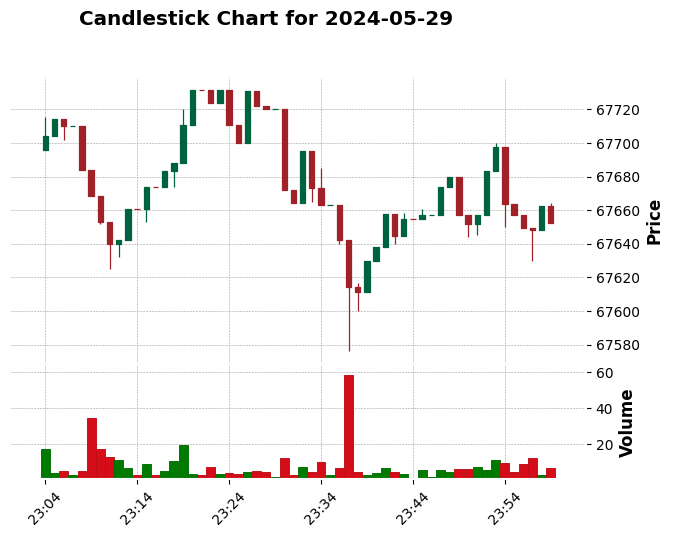

In [31]:
import mplfinance as mpf
import pandas as pd


# Filter for a specific date, e.g., May 29, 2024
date_to_plot = "2024-05-29"
df_filtered = df[df.index.date == pd.to_datetime(date_to_plot).date()]

# Plot the candlestick chart
if not df_filtered.empty:
    mpf.plot(df_filtered, type='candle', style='charles', title=f'Candlestick Chart for {date_to_plot}', ylabel='Price', volume=True)
else:
    print(f"No data available for {date_to_plot}")


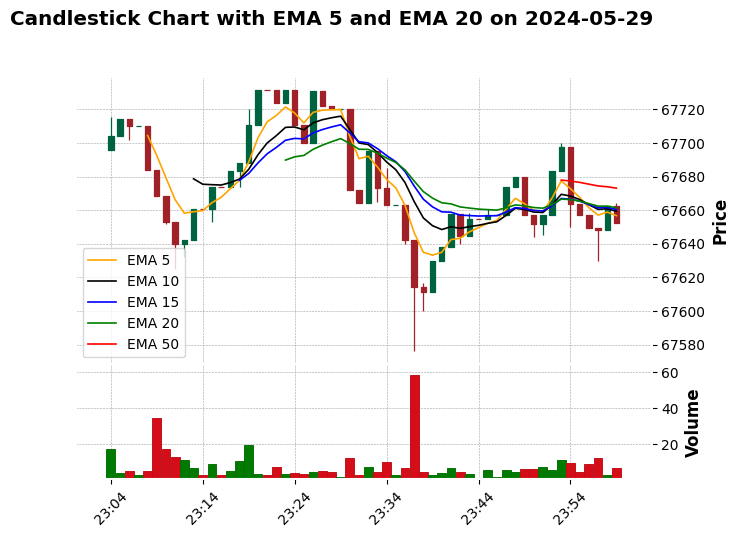

In [32]:
import mplfinance as mpf
import pandas as pd

# Filter for a specific date if needed, e.g., one day like May 29, 2024
date_to_plot = "2024-05-29"
df_filtered = df[df.index.date == pd.to_datetime(date_to_plot).date()]

# Prepare the additional EMA lines for plotting
add_plot = [
    mpf.make_addplot(df_filtered['EMA_5'], color='orange', width=1.2, label='EMA 5'),
    mpf.make_addplot(df_filtered['EMA_10'], color='black', width=1.2, label='EMA 10'),
    mpf.make_addplot(df_filtered['EMA_15'], color='blue', width=1.2, label='EMA 15'),
    mpf.make_addplot(df_filtered['EMA_20'], color='green', width=1.2, label='EMA 20'),
    mpf.make_addplot(df_filtered['EMA_50'], color='red', width=1.2, label='EMA 50')
]

# Plot the candlestick chart with EMAs
if not df_filtered.empty:
    mpf.plot(
        df_filtered,
        type='candle',
        style='charles',
        title=f'Candlestick Chart with EMA 5 and EMA 20 on {date_to_plot}',
        ylabel='Price',
        volume=True,
        addplot=add_plot
    )
else:
    print(f"No data available for {date_to_plot}")


In [33]:
# Creating RSI for different time periods

# Calculate RSI for scalping (7-period)
df['RSI_7'] = talib.RSI(df['close'], timeperiod=7)

# Calculate RSI for day trading (14-period)
df['RSI_14'] = talib.RSI(df['close'], timeperiod=14)

# Calculate RSI for swing trading (21-period)
df['RSI_21'] = talib.RSI(df['close'], timeperiod=21)

# Display the DataFrame with the new RSI columns
df[['close', 'RSI_7', 'RSI_14', 'RSI_21']].head(n=10)


,close,RSI_7,RSI_14,RSI_21
date,,,,
2024-05-29 23:04:00,67704.01,NaN,NaN,NaN
2024-05-29 23:05:00,67713.99,NaN,NaN,NaN
2024-05-29 23:06:00,67710.17,NaN,NaN,NaN
2024-05-29 23:07:00,67710.18,NaN,NaN,NaN
2024-05-29 23:08:00,67683.80,NaN,NaN,NaN
2024-05-29 23:09:00,67668.61,NaN,NaN,NaN
2024-05-29 23:10:00,67652.72,NaN,NaN,NaN
2024-05-29 23:11:00,67639.99,11.892857,NaN,NaN
2024-05-29 23:12:00,67642.29,14.620265,NaN,NaN


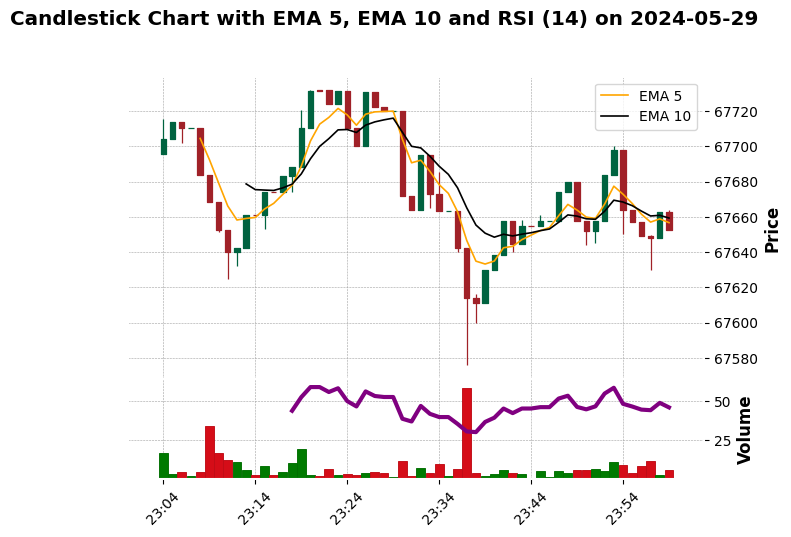

In [34]:
import mplfinance as mpf
import pandas as pd

# Filter for a specific date if needed, e.g., one day like May 29, 2024
date_to_plot = "2024-05-29"
df_filtered = df[df.index.date == pd.to_datetime(date_to_plot).date()]

# Prepare the EMA and RSI (for day trading) plots
add_plot = [
    mpf.make_addplot(df_filtered['EMA_5'], color='orange', width=1.2, label='EMA 5'),
    mpf.make_addplot(df_filtered['EMA_10'], color='black', width=1.2, label='EMA 10'),
    mpf.make_addplot(df_filtered['RSI_14'], panel=1, color='purple', ylabel='RSI (14)'),  # Day trading RSI in a separate panel
    #mpf.make_addplot([70]*len(df_filtered), panel=1, color='red', linestyle='--', label='Overbought (70)'),  # Overbought line
    #mpf.make_addplot([30]*len(df_filtered), panel=1, color='green', linestyle='--', label='Oversold (30)')   # Oversold line
]

# Plot the candlestick chart with EMA 5, EMA 10, and RSI 14 on a secondary panel
if not df_filtered.empty:
    mpf.plot(
        df_filtered,
        type='candle',
        style='charles',
        title=f'Candlestick Chart with EMA 5, EMA 10 and RSI (14) on {date_to_plot}',
        ylabel='Price',
        volume=True,
        addplot=add_plot,
        panel_ratios=(3, 1)  # Main chart gets more space than the RSI panel
    )
else:
    print(f"No data available for {date_to_plot}")


In [35]:
# Calculate MACD with adjusted periods (e.g., 7, 21, 5)
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['close'], fastperiod=7, slowperiod=21, signalperiod=5)

# Display the DataFrame with MACD, Signal Line, and Histogram columns
df[['close', 'MACD', 'MACD_Signal', 'MACD_Hist']].tail()


,close,MACD,MACD_Signal,MACD_Hist
date,,,,
2024-09-04 23:55:00,57976.00,-30.283218,-40.705596,10.422378
2024-09-04 23:56:00,57978.99,-26.133692,-35.848294,9.714602
2024-09-04 23:57:00,57963.00,-25.254386,-32.316992,7.062606
2024-09-04 23:58:00,57968.01,-23.283850,-29.305945,6.022094
2024-09-04 23:59:00,57970.90,-20.951352,-26.521081,5.569728


In [36]:
# Bollinger Bands with 10 periods and 1.5 standard deviations
df['upper_band_10_1_5'], df['middle_band_10_1_5'], df['lower_band_10_1_5'] = talib.BBANDS(
    df['close'], timeperiod=10, nbdevup=1.5, nbdevdn=1.5, matype=1)

# Bollinger Bands with 10 periods and 2 standard deviations
df['upper_band_10_2'], df['middle_band_10_2'], df['lower_band_10_2'] = talib.BBANDS(
    df['close'], timeperiod=10, nbdevup=2, nbdevdn=2, matype=1)

# Bollinger Bands with 20 periods and 1.5 standard deviations
df['upper_band_20_1_5'], df['middle_band_20_1_5'], df['lower_band_20_1_5'] = talib.BBANDS(
    df['close'], timeperiod=20, nbdevup=1.5, nbdevdn=1.5, matype=1)

# Bollinger Bands with 20 periods and 2 standard deviations
df['upper_band_20_2'], df['middle_band_20_2'], df['lower_band_20_2'] = talib.BBANDS(
    df['close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=1)


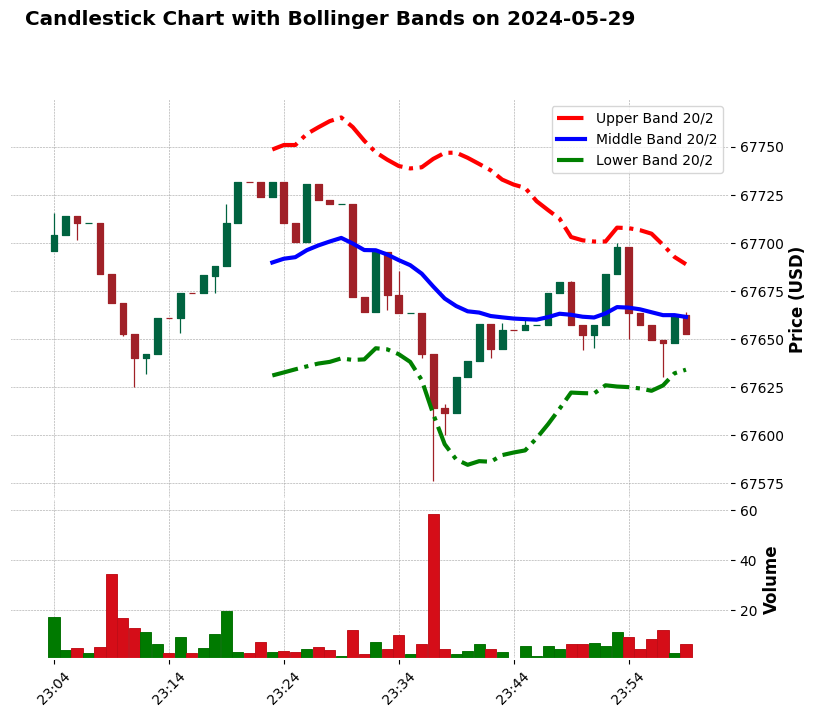

In [37]:
import mplfinance as mpf
import pandas as pd

# Convert index to datetime if not already
df.index = pd.to_datetime(df.index)

# Filter for a specific date, e.g., May 29, 2024
date_to_plot = "2024-05-29"
df_filtered = df.loc[df.index.date == pd.to_datetime(date_to_plot).date()]

# Prepare the Bollinger Bands for plotting
add_plot = [
    mpf.make_addplot(df_filtered['upper_band_20_2'], color='r', linestyle='dashdot', label='Upper Band 20/2'),
    mpf.make_addplot(df_filtered['middle_band_20_2'], color='b', linestyle='solid', label='Middle Band 20/2'),
    mpf.make_addplot(df_filtered['lower_band_20_2'], color='g', linestyle='dashdot', label='Lower Band 20/2')
]

# Check if the filtered DataFrame is not empty
if not df_filtered.empty:
    # Plot the candlestick chart with Bollinger Bands
    mpf.plot(
        df_filtered,
        type='candle',
        style='charles',
        title=f'Candlestick Chart with Bollinger Bands on {date_to_plot}',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        addplot=add_plot,
        figsize=(10, 8)
    )
else:
    print(f"No data available for {date_to_plot}")


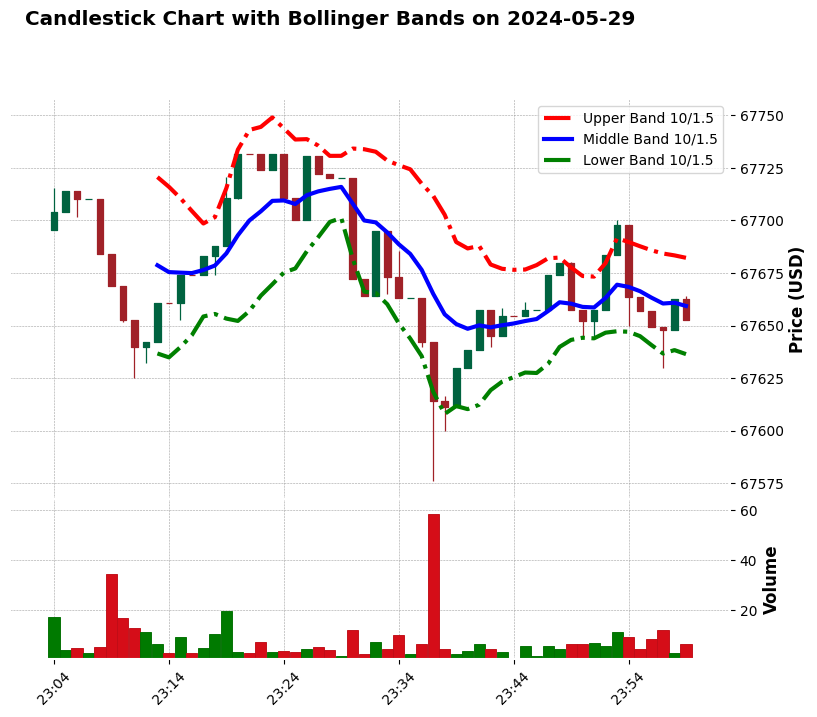

In [38]:
import mplfinance as mpf
import pandas as pd

# Convert index to datetime if not already
df.index = pd.to_datetime(df.index)

# Filter for a specific date, e.g., May 29, 2024
date_to_plot = "2024-05-29"
df_filtered = df.loc[df.index.date == pd.to_datetime(date_to_plot).date()]

# Prepare the Bollinger Bands for plotting
add_plot = [
    mpf.make_addplot(df_filtered['upper_band_10_1_5'], color='r', linestyle='dashdot', label='Upper Band 10/1.5'),
    mpf.make_addplot(df_filtered['middle_band_10_1_5'], color='b', linestyle='solid', label='Middle Band 10/1.5'),
    mpf.make_addplot(df_filtered['lower_band_10_1_5'], color='g', linestyle='dashdot', label='Lower Band 10/1.5')
]

# Check if the filtered DataFrame is not empty
if not df_filtered.empty:
    # Plot the candlestick chart with Bollinger Bands
    mpf.plot(
        df_filtered,
        type='candle',
        style='charles',
        title=f'Candlestick Chart with Bollinger Bands on {date_to_plot}',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        addplot=add_plot,
        figsize=(10, 8)
    )
else:
    print(f"No data available for {date_to_plot}")


In [39]:
# Trading Signals using only SMA

In [40]:
# Rename columns to fit the Backtesting.py requirements
df = df.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'  
})

In [44]:
# Trim the DataFrame to start from the first non-NaN value of SMA_10
df_backtest = df.loc[df['SMA_10'].first_valid_index():].copy()

max_close = df_backtest['Close'].max()
target_max_price = 100
scale_factor = max_close / target_max_price

df_backtest['Open'] /= scale_factor
df_backtest['High'] /= scale_factor
df_backtest['Low'] /= scale_factor
df_backtest['Close'] /= scale_factor

class SMAStrategy(Strategy):
    def init(self):
        super().init()
        self.trade_allowed = True
        self.equity_high = self.equity  # Initialize high watermark for equity
        # Directly use precomputed SMA columns from the DataFrame
        self.sma1 = self.I(lambda x: x, self.data.SMA_5)
        self.sma2 = self.I(lambda x: x, self.data.SMA_10)

    def next(self):
        # Update high watermark and calculate drawdown
        current_equity = self.equity
        self.equity_high = max(self.equity_high, current_equity)
        drawdown = (self.equity_high - current_equity) / self.equity_high
        
        # Check for drawdown limit
        if drawdown > 0.2:
            if self.position:
                self.position.close()  # Close any open position
            self.trade_allowed = False  # Disable further trading
            return

        # Normal trading logic, only if trading is allowed
        if self.trade_allowed:
            if crossover(self.sma1, self.sma2):
                if not self.position:
                    self.buy()
            elif crossover(self.sma2, self.sma1):
                if self.position:
                    self.position.close()

# Rename columns if necessary
df_backtest.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)

# Prepare the backtest as before
bt = Backtest(df_backtest, SMAStrategy, cash=10000, commission=.002, exclusive_orders=True)
output = bt.run()
print(output)


Start                     2024-05-29 23:13:00
End                       2024-09-04 23:59:00
Duration                     98 days 00:46:00
Exposure Time [%]                    0.957114
Equity Final [$]                  7982.455176
Equity Peak [$]                       10000.0
Return [%]                         -20.175448
Buy & Hold Return [%]              -14.321316
Return (Ann.) [%]                  -55.859978
Volatility (Ann.) [%]               13.048159
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -20.175448
Avg. Drawdown [%]                  -20.175448
Max. Drawdown Duration       98 days 00:42:00
Avg. Drawdown Duration       98 days 00:42:00
# Trades                                  123
Win Rate [%]                        10.569106
Best Trade [%]                       0.439162
Worst Trade [%]                     -0.468436
Avg. Trade [%]                    

In [42]:
# Trading using SMA 2 and 5 periods

In [48]:
# Trim the DataFrame to start from the first non-NaN value of SMA_5
df_backtest = df.loc[df['SMA_5'].first_valid_index():].copy()

max_close = df_backtest['Close'].max()
target_max_price = 100
scale_factor = max_close / target_max_price

df_backtest['Open'] /= scale_factor
df_backtest['High'] /= scale_factor
df_backtest['Low'] /= scale_factor
df_backtest['Close'] /= scale_factor
class SMAStrategy(Strategy):
    def init(self):
        super().init()
        self.trade_allowed = True
        self.equity_high = self.equity  # Initialize high watermark for equity
        # Directly use precomputed SMA columns from the DataFrame
        self.sma1 = self.I(lambda x: x, self.data.SMA_2)
        self.sma2 = self.I(lambda x: x, self.data.SMA_5)

    def next(self):
        # Update high watermark and calculate drawdown
        current_equity = self.equity
        self.equity_high = max(self.equity_high, current_equity)
        drawdown = (self.equity_high - current_equity) / self.equity_high
        
        # Check for drawdown limit
        if drawdown > 0.2:
            if self.position:
                self.position.close()  # Close any open position
            self.trade_allowed = False  # Disable further trading
            return

        # Normal trading logic, only if trading is allowed
        if self.trade_allowed:
            if crossover(self.sma1, self.sma2):
                if not self.position:
                    self.buy()
            elif crossover(self.sma2, self.sma1):
                if self.position:
                    self.position.close()

# Prepare the backtest as before
bt = Backtest(df_backtest, SMAStrategy, cash=10000, commission=.002, exclusive_orders=True)
output = bt.run()
print(output)


Start                     2024-05-29 23:08:00
End                       2024-09-04 23:59:00
Duration                     98 days 00:51:00
Exposure Time [%]                    0.557558
Equity Final [$]                  7987.196099
Equity Peak [$]                       10000.0
Return [%]                         -20.128039
Buy & Hold Return [%]              -14.350406
Return (Ann.) [%]                  -55.004186
Volatility (Ann.) [%]               17.566398
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -20.128039
Avg. Drawdown [%]                  -20.128039
Max. Drawdown Duration       98 days 00:45:00
Avg. Drawdown Duration       98 days 00:45:00
# Trades                                  122
Win Rate [%]                         9.016393
Best Trade [%]                       0.347259
Worst Trade [%]                     -0.376825
Avg. Trade [%]                    

In [20]:
# Lets go EMA

In [21]:
# Trim the DataFrame to start from the first non-NaN value of EMA_5
df_backtest = df.loc[df['EMA_5'].first_valid_index():].copy()

max_close = df_backtest['Close'].max()
target_max_price = 100
scale_factor = max_close / target_max_price

df_backtest['Open'] /= scale_factor
df_backtest['High'] /= scale_factor
df_backtest['Low'] /= scale_factor
df_backtest['Close'] /= scale_factor

class EMAStrategy(Strategy):
    def init(self):
        super().init()
        self.trade_allowed = True
        self.equity_high = self.equity  # Initialize high watermark for equity
        # Directly use precomputed SMA columns from the DataFrame
        self.ema1 = self.I(lambda x: x, self.data.EMA_2)
        self.ema2 = self.I(lambda x: x, self.data.EMA_5)

    def next(self):
        # Update high watermark and calculate drawdown
        current_equity = self.equity
        self.equity_high = max(self.equity_high, current_equity)
        drawdown = (self.equity_high - current_equity) / self.equity_high
        
        # Check for drawdown limit
        if drawdown > 0.2:
            if self.position:
                self.position.close()  # Close any open position
            self.trade_allowed = False  # Disable further trading
            return

        # Normal trading logic, only if trading is allowed
        if self.trade_allowed:
            if crossover(self.ema1, self.ema2):
                if not self.position:
                    self.buy()
            elif crossover(self.ema2, self.ema1):
                if self.position:
                    self.position.close()

# Prepare the backtest as before
bt = Backtest(df_backtest, EMAStrategy, cash=10000, commission=.002, exclusive_orders=True)
output = bt.run()
print(output)


Start                     2024-05-29 23:08:00
End                       2024-09-04 23:59:00
Duration                     98 days 00:51:00
Exposure Time [%]                    0.573066
Equity Final [$]                  7998.086743
Equity Peak [$]                       10000.0
Return [%]                         -20.019133
Buy & Hold Return [%]              -14.350406
Return (Ann.) [%]                  -54.705714
Volatility (Ann.) [%]               17.541964
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -20.019133
Avg. Drawdown [%]                  -20.019133
Max. Drawdown Duration       98 days 00:44:00
Avg. Drawdown Duration       98 days 00:44:00
# Trades                                  119
Win Rate [%]                         5.882353
Best Trade [%]                       0.283576
Worst Trade [%]                     -0.400621
Avg. Trade [%]                    

In [22]:
# Attempt 1 at combinations of indicators

In [62]:
# Trim the DataFrame to start from the first non-NaN value of EMA_5
df_backtest = df.loc[df['EMA_5'].first_valid_index():].copy()

max_close = df_backtest['Close'].max()
target_max_price = 100
scale_factor = max_close / target_max_price

df_backtest['Open'] /= scale_factor
df_backtest['High'] /= scale_factor
df_backtest['Low'] /= scale_factor
df_backtest['Close'] /= scale_factor

class EMAStrategy(Strategy):
    def init(self):
        super().init()
        self.trade_allowed = True
        self.equity_high = self.equity  # Initialize high watermark for equity
        # Directly use precomputed EMA, RSI, and Bollinger Bands from the DataFrame
        self.ema2 = self.I(lambda x: x, self.data.EMA_2)
        self.ema5 = self.I(lambda x: x, self.data.EMA_5)
        self.rsi = self.I(lambda x: x, self.data.RSI_14)  
        # Use already computed Bollinger Bands
        self.upper_band = self.I(lambda x: x, self.data.upper_band_10_1_5)
        self.middle_band = self.I(lambda x: x, self.data.middle_band_10_1_5)
        self.lower_band = self.I(lambda x: x, self.data.lower_band_10_1_5)

    def next(self):
        # Update high watermark and calculate drawdown
        current_equity = self.equity
        self.equity_high = max(self.equity_high, current_equity)
        drawdown = (self.equity_high - current_equity) / self.equity_high
        
        # Check for drawdown limit
        if drawdown > 0.2:
            if self.position:
                self.position.close()  # Close any open position
            self.trade_allowed = False  # Disable further trading
            return

        # Trading logic, only if trading is allowed
        if self.trade_allowed:
            # EMA crossover and RSI conditions
            if crossover(self.ema2, self.ema5) and self.rsi[-1] < 30 and self.data.Close[-1] < self.lower_band[-1]:
                if not self.position:
                    self.buy()
            elif crossover(self.ema5, self.ema2) and self.rsi[-1] > 70 and self.data.Close[-1] > self.upper_band[-1]:
                if self.position:
                    self.position.close()

            

# Ensure your DataFrame 'df_backtest' has the necessary columns
df_backtest.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)

# Assuming df_backtest is your DataFrame and it's indexed by date
bt = Backtest(df_backtest, EMAStrategy, cash=10000, commission=.002, exclusive_orders=True)
output = bt.run()
print(output)


Start                     2024-05-29 23:08:00
End                       2024-09-04 23:59:00
Duration                     98 days 00:51:00
Exposure Time [%]                   33.172835
Equity Final [$]                  8472.721741
Equity Peak [$]                  10593.824854
Return [%]                         -15.272783
Buy & Hold Return [%]              -14.350406
Return (Ann.) [%]                  -45.721224
Volatility (Ann.) [%]               11.659026
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -20.022085
Avg. Drawdown [%]                   -0.795035
Max. Drawdown Duration       89 days 11:41:00
Avg. Drawdown Duration        1 days 23:24:00
# Trades                                    1
Win Rate [%]                              0.0
Best Trade [%]                     -15.417436
Worst Trade [%]                    -15.417436
Avg. Trade [%]                    

In [24]:
/////////////////////

SyntaxError: invalid syntax (2528972692.py, line 1)

In [ ]:
import pandas as pd
from dateutil import parser

def fetch_data_for_time_frame(df):
    # Ask the user for the desired time frame
    time_frame = input("Enter the desired time frame (e.g., 15min, 1hr): ")
    # Ask the user for the specific start date and time
    start_date_str = input("Enter the start date and time (YYYY-MM-DD HH:MM): ")
    
    try:
        # Convert the start date string to datetime
        start_date = parser.parse(start_date_str)
    except ValueError:
        print("Invalid date format. Please enter a valid date and time.")
        return None
    
    # Calculate the end date based on the start date and the time frame
    if 'min' in time_frame:
        minutes = int(time_frame.replace('min', ''))
        end_date = start_date + pd.Timedelta(minutes=minutes)
    elif 'hr' in time_frame:
        hours = int(time_frame.replace('hr', ''))
        end_date = start_date + pd.Timedelta(hours=hours)
    else:
        print("Unsupported time frame. Please enter a time frame like '15min' or '1hr'.")
        return None
    
    # Filter the dataframe for the specified time range
    mask = (df.index >= start_date) & (df.index < end_date)
    result_df = df.loc[mask]

    if result_df.empty:
        print("No data available for the specified time frame and date range.")
        return None
    
    return result_df

# Assuming 'df' is your main DataFrame and the date column is set as the index
df.index = pd.to_datetime(df.index)  # Ensure the index is in datetime format if not already
filtered_data = fetch_data_for_time_frame(df)

if filtered_data is not None:
    print(filtered_data)


In [ ]:
import pandas as pd
from dateutil import parser

def fetch_data_for_time_frame(df):
    # Ask the user for the desired time frame
    time_frame = input("Enter the desired time frame (e.g., 15min, 1hr, 4hr, 8hr, 24hr, 1 week): ")
    # Ask the user for the specific start date and time
    start_date_str = input("Enter the start date and time (YYYY-MM-DD HH:MM): ")
    
    try:
        # Convert the start date string to datetime
        start_date = parser.parse(start_date_str)
    except ValueError:
        print("Invalid date format. Please enter a valid date and time.")
        return None
    
    # Calculate the end date based on the start date and the time frame
    if 'min' in time_frame:
        minutes = int(time_frame.replace('min', ''))
        end_date = start_date + pd.Timedelta(minutes=minutes)
    elif 'hr' in time_frame:
        hours = int(time_frame.replace('hr', ''))
        end_date = start_date + pd.Timedelta(hours=hours)
    elif 'week' in time_frame:
        weeks = int(time_frame.replace(' week', ''))
        end_date = start_date + pd.Timedelta(weeks=weeks)
    else:
        print("Unsupported time frame. Please enter a time frame like '15min', '1hr', '4hr', '8hr', '24hr', or '1 week'.")
        return None
    
    # Filter the dataframe for the specified time range
    mask = (df.index >= start_date) & (df.index < end_date)
    result_df = df.loc[mask]

    if result_df.empty:
        print("No data available for the specified time frame and date range.")
        return None
    
    return result_df

# Assuming 'df' is your main DataFrame and the date column is set as the index
df.index = pd.to_datetime(df.index)  # Ensure the index is in datetime format if not already
filtered_data = fetch_data_for_time_frame(df)

if filtered_data is not None:
    print(filtered_data)


In [ ]:
filtered_data.head()

In [ ]:
# Trim the DataFrame to start from the first non-NaN value of SMA_10
df_backtest = filtered_data.loc[filtered_data['SMA_10'].first_valid_index():].copy()

max_close = df_backtest['Close'].max()
target_max_price = 100
scale_factor = max_close / target_max_price

df_backtest['Open'] /= scale_factor
df_backtest['High'] /= scale_factor
df_backtest['Low'] /= scale_factor
df_backtest['Close'] /= scale_factor

class SMAStrategy(Strategy):
    def init(self):
        super().init()
        self.trade_allowed = True
        self.equity_high = self.equity  # Initialize high watermark for equity
        # Directly use precomputed SMA columns from the DataFrame
        self.sma1 = self.I(lambda x: x, self.data.SMA_5)
        self.sma2 = self.I(lambda x: x, self.data.SMA_10)

    def next(self):
        # Update high watermark and calculate drawdown
        current_equity = self.equity
        self.equity_high = max(self.equity_high, current_equity)
        drawdown = (self.equity_high - current_equity) / self.equity_high
        
        # Check for drawdown limit
        if drawdown > 0.2:
            if self.position:
                self.position.close()  # Close any open position
            self.trade_allowed = False  # Disable further trading
            return

        # Normal trading logic, only if trading is allowed
        if self.trade_allowed:
            if crossover(self.sma1, self.sma2):
                if not self.position:
                    self.buy()
            elif crossover(self.sma2, self.sma1):
                if self.position:
                    self.position.close()

# Rename columns if necessary
df_backtest.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)

# Prepare the backtest as before
bt = Backtest(df_backtest, SMAStrategy, cash=10000, commission=.002, exclusive_orders=True)
output = bt.run()
print(output)


In [ ]:
import numpy as np

# Example data from the strategy output
initial_cash = 10000
final_equity = 9929.311888
buy_and_hold_final_equity = 9912  # Example value for buy and hold final equity
duration_in_days = 59 / 1440  # Convert minutes to days for annualization

# Calculate return percentage
strategy_return_percentage = (final_equity - initial_cash) / initial_cash
buy_and_hold_return_percentage = (buy_and_hold_final_equity - initial_cash) / initial_cash

# Annualized Return
annualized_return = ((1 + strategy_return_percentage) ** (365 / duration_in_days)) - 1

# Placeholder for standard deviation of daily returns
# Assuming some daily returns for example purposes; replace with actual daily returns array
example_daily_returns = [strategy_return_percentage]  # This should be an array of daily returns
std_dev_daily_returns = np.std(example_daily_returns)

# Annualized Volatility
annualized_volatility = std_dev_daily_returns * np.sqrt(365)

# Assuming risk-free rate is zero for simplicity
risk_free_rate = 0
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility if annualized_volatility != 0 else None

# Comparison with Buy/Hold Strategy
comparison_ratio = strategy_return_percentage / buy_and_hold_return_percentage if buy_and_hold_return_percentage != 0 else float('inf')

print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio if sharpe_ratio is not None else 'N/A'}")
print(f"Comparison with Buy/Hold Strategy: {comparison_ratio:.2f}x")


In [ ]:
import pandas as pd
from dateutil import parser
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

class SMAStrategy(Strategy):
    def init(self):
        self.sma1 = self.I(pd.Series.rolling, self.data.Close, window=2, min_periods=1).mean()
        self.sma2 = self.I(pd.Series.rolling, self.data.Close, window=5, min_periods=1).mean()

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()

def fetch_data_for_time_frame(df1, start_time_str, time_frame):
    try:
        start_time = parser.parse(start_time_str)
        period = int(time_frame[:-2])
        unit = time_frame[-2:]

        if unit == 'min':
            end_time = start_time + pd.Timedelta(minutes=period)
        elif unit == 'hr':
            end_time = start_time + pd.Timedelta(hours=period)
        elif unit == 'week':
            end_time = start_time + pd.Timedelta(weeks=period)
        else:
            raise ValueError("Unsupported time frame.")

        mask = (df1.index >= start_time) & (df1.index < end_time)
        return df1.loc[mask]
    except Exception as e:
        print(f"Error processing data for time frame: {e}")
        return None

def run_backtests_continuously(df1, start_time_str, time_frame):
    current_start_time = parser.parse(start_time_str)
    results = []
    while current_start_time < df1.index[-1]:
        window_data = fetch_data_for_time_frame(df1, current_start_time.isoformat(), time_frame)
        if window_data is not None and not window_data.empty:
            scaled_data = scale_data(window_data.copy())
            bt = Backtest(scaled_data, SMAStrategy, cash=10000, commission=0.002)
            stats = bt.run()
            results.append(stats)
            print(stats)
        current_start_time += pd.Timedelta(minutes=int(time_frame[:-2]) if 'min' in time_frame else int(time_frame[:-2]) * 60 if 'hr' in time_frame else int(time_frame[:-4]) * 1440 if 'week' in time_frame else 0)
    return results

def scale_data(data):
    max_close = data['Close'].max()
    target_max_price = 100
    scale_factor = max_close / target_max_price
    data['Open'] /= scale_factor
    data['High'] /= scale_factor
    data['Low'] /= scale_factor
    data['Close'] /= scale_factor
    return data

# Example usage
df1 = pd.DataFrame(df).copy()
start_time = '2024-05-30 00:01:00'  # Adjust as needed
time_frame = '15min'  # Can be '15min', '1hr', '4hr', '8hr', '24hr', '1week'
results = run_backtests_continuously(df1, start_time, time_frame)


In [ ]:
import pandas as pd
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from dateutil import parser

# Function to fetch data for each time frame
def fetch_data_for_time_frame(df, start_date, time_frame):
    if 'min' in time_frame:
        minutes = int(time_frame.replace('min', ''))
        end_date = start_date + pd.Timedelta(minutes=minutes)
    elif 'hr' in time_frame:
        hours = int(time_frame.replace('hr', ''))
        end_date = start_date + pd.Timedelta(hours=hours)
    elif 'week' in time_frame:
        weeks = int(time_frame.replace(' week', ''))
        end_date = start_date + pd.Timedelta(weeks=weeks)
    else:
        print("Unsupported time frame. Please enter a time frame like '15min', '1hr', '4hr', '8hr', '24hr', or '1 week'.")
        return None, None

    # Filter the DataFrame for the specified time range
    mask = (df.index >= start_date) & (df.index < end_date)
    result_df = df.loc[mask]
    return result_df, end_date

# Looping and storing results
def backtest_multiple_time_frames(df, time_frame):
    results = []  # To store outputs
    start_date = df.index.min()  # Start from the earliest date in the dataset

    while start_date < df.index.max():
        # Fetch data for the current time frame
        filtered_data, end_date = fetch_data_for_time_frame(df, start_date, time_frame)
        if filtered_data is None or filtered_data.empty:
            break  # Exit if no data is returned for the time frame

        # Trim the DataFrame to start from the first non-NaN value of SMA_10
        df_backtest = filtered_data.loc[filtered_data['EMA_5'].first_valid_index():].copy()

        if df_backtest.empty:
            start_date = end_date  # Move to the next time frame
            continue

        max_close = df_backtest['Close'].max()
        target_max_price = 100
        scale_factor = max_close / target_max_price

        df_backtest['Open'] /= scale_factor
        df_backtest['High'] /= scale_factor
        df_backtest['Low'] /= scale_factor
        df_backtest['Close'] /= scale_factor

        class EMAStrategy(Strategy):
            def init(self):
                super().init()
                self.trade_allowed = True
                self.equity_high = self.equity  # Initialize high watermark for equity
                self.ema1 = self.I(lambda x: x, self.data.EMA_2)
                self.ema2 = self.I(lambda x: x, self.data.EMA_5)

            def next(self):
                # Update high watermark and calculate drawdown
                current_equity = self.equity
                self.equity_high = max(self.equity_high, current_equity)
                drawdown = (self.equity_high - current_equity) / self.equity_high
                
                # Check for drawdown limit
                if drawdown > 0.2:
                    if self.position:
                        self.position.close()  # Close any open position
                    self.trade_allowed = False  # Disable further trading
                    return

                # Normal trading logic, only if trading is allowed
                if self.trade_allowed:
                    if crossover(self.ema1, self.ema2):
                        if not self.position:
                            self.buy()
                    elif crossover(self.ema2, self.ema1):
                        if self.position:
                            self.position.close()

        # Rename columns if necessary
        df_backtest.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)

        # Backtest for the current time frame
        bt = Backtest(df_backtest, EMAStrategy, cash=10000, commission=.002, exclusive_orders=True)
        output = bt.run()
        results.append((start_date, end_date, output))

        # Move to the next time frame
        start_date = end_date

    return results

df.index = pd.to_datetime(df.index)  # Ensure the index is in datetime format if not already

# Run the loop for a specific time frame (e.g., '15min')
time_frame = '1 week'
results = backtest_multiple_time_frames(df, time_frame)

# Print the results
for start, end, output in results:
    print(f"Time Frame: {start} to {end}")
    print(output)


In [53]:
import pandas as pd
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from dateutil import parser

# Function to fetch data for each time frame
def fetch_data_for_time_frame(df, start_date, time_frame):
    if 'min' in time_frame:
        minutes = int(time_frame.replace('min', ''))
        end_date = start_date + pd.Timedelta(minutes=minutes)
    elif 'hr' in time_frame:
        hours = int(time_frame.replace('hr', ''))
        end_date = start_date + pd.Timedelta(hours=hours)
    elif 'week' in time_frame:
        weeks = int(time_frame.replace(' week', ''))
        end_date = start_date + pd.Timedelta(weeks=weeks)
    elif 'day' in time_frame or '24hr' in time_frame:
        days = 1  # Assuming 1 day for 24hr
        end_date = start_date + pd.Timedelta(days=days)
    else:
        print("Unsupported time frame. Please enter a valid time frame (e.g., '15min', '1hr', '4hr', '8hr', '24hr', or '1 week').")
        return None, None

    # Filter the DataFrame for the specified time range
    mask = (df.index >= start_date) & (df.index < end_date)
    result_df = df.loc[mask]
    return result_df, end_date

# Looping and storing results
def backtest_multiple_time_frames(df, time_frame):
    results = []  # To store outputs
    start_date = df.index.min()  # Start from the earliest date in the dataset

    while start_date < df.index.max():
        # Fetch data for the current time frame
        filtered_data, end_date = fetch_data_for_time_frame(df, start_date, time_frame)
        if filtered_data is None or filtered_data.empty:
            break  # Exit if no data is returned for the time frame

        # Trim the DataFrame to start from the first non-NaN value of EMA_5
        df_backtest = filtered_data.loc[filtered_data['EMA_5'].first_valid_index():].copy()

        if df_backtest.empty:
            start_date = end_date  # Move to the next time frame
            continue

        max_close = df_backtest['Close'].max()
        target_max_price = 100
        scale_factor = max_close / target_max_price

        df_backtest['Open'] /= scale_factor
        df_backtest['High'] /= scale_factor
        df_backtest['Low'] /= scale_factor
        df_backtest['Close'] /= scale_factor

        class EMAStrategy(Strategy):
            def init(self):
                super().init()
                self.trade_allowed = True
                self.equity_high = self.equity  # Initialize high watermark for equity
                self.ema1 = self.I(lambda x: x, self.data.EMA_2)
                self.ema2 = self.I(lambda x: x, self.data.EMA_5)

            def next(self):
                # Update high watermark and calculate drawdown
                current_equity = self.equity
                self.equity_high = max(self.equity_high, current_equity)
                drawdown = (self.equity_high - current_equity) / self.equity_high
                
                # Check for drawdown limit
                if drawdown > 0.2:
                    if self.position:
                        self.position.close()  # Close any open position
                    self.trade_allowed = False  # Disable further trading
                    return

                # Normal trading logic, only if trading is allowed
                if self.trade_allowed:
                    if crossover(self.ema1, self.ema2):
                        if not self.position:
                            self.buy()
                    elif crossover(self.ema2, self.ema1):
                        if self.position:
                            self.position.close()

        # Rename columns if necessary
        df_backtest.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)

        # Backtest for the current time frame
        bt = Backtest(df_backtest, EMAStrategy, cash=10000, commission=.002, exclusive_orders=True)
        output = bt.run()
        results.append((start_date, end_date, output))

        # Move to the next time frame
        start_date = end_date

    return results

df.index = pd.to_datetime(df.index)  # Ensure the index is in datetime format if not already

# Ask user for the desired time frame
time_frame = input("Enter the desired time frame (e.g., '15min', '1hr', '4hr', '8hr', '24hr', '1 week'): ")

# Run the loop for the specified time frame
results = backtest_multiple_time_frames(df, time_frame)

# Print the results
for start, end, output in results:
    print(f"Time Frame: {start} to {end}")
    print(output)


Enter the desired time frame (e.g., '15min', '1hr', '4hr', '8hr', '24hr', '1 week'):  1 week


Time Frame: 2024-05-29 23:04:00 to 2024-06-05 23:04:00
Start                     2024-05-29 23:08:00
End                       2024-06-05 23:03:00
Duration                      6 days 23:55:00
Exposure Time [%]                    7.701469
Equity Final [$]                  7997.848642
Equity Peak [$]                       10000.0
Return [%]                         -20.021514
Buy & Hold Return [%]                5.137241
Return (Ann.) [%]                  -99.994464
Volatility (Ann.) [%]                0.014406
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -20.021514
Avg. Drawdown [%]                  -20.021514
Max. Drawdown Duration        6 days 23:48:00
Avg. Drawdown Duration        6 days 23:48:00
# Trades                                  119
Win Rate [%]                         5.882353
Best Trade [%]                       0.283576
Worst Trade [%]          

In [63]:
import pandas as pd
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from dateutil import parser

# Function to fetch data for each time frame
def fetch_data_for_time_frame(df, start_date, time_frame):
    if 'min' in time_frame:
        minutes = int(time_frame.replace('min', ''))
        end_date = start_date + pd.Timedelta(minutes=minutes)
    elif 'hr' in time_frame:
        hours = int(time_frame.replace('hr', ''))
        end_date = start_date + pd.Timedelta(hours=hours)
    elif 'week' in time_frame:
        weeks = int(time_frame.replace(' week', ''))
        end_date = start_date + pd.Timedelta(weeks=weeks)
    elif 'day' in time_frame or '24hr' in time_frame:
        days = 1  # Assuming 1 day for 24hr
        end_date = start_date + pd.Timedelta(days=days)
    else:
        print("Unsupported time frame. Please enter a valid time frame (e.g., '15min', '1hr', '4hr', '8hr', '24hr', or '1 week').")
        return None, None

    # Filter the DataFrame for the specified time range
    mask = (df.index >= start_date) & (df.index < end_date)
    result_df = df.loc[mask]
    return result_df, end_date

# Looping and storing results
def backtest_multiple_time_frames(df, time_frame):
    results = []  # To store outputs
    start_date = df.index.min()  # Start from the earliest date in the dataset

    while start_date < df.index.max():
        # Fetch data for the current time frame
        filtered_data, end_date = fetch_data_for_time_frame(df, start_date, time_frame)
        if filtered_data is None or filtered_data.empty:
            break  # Exit if no data is returned for the time frame

        # Trim the DataFrame to start from the first non-NaN value of EMA_5
        df_backtest = filtered_data.loc[filtered_data['EMA_5'].first_valid_index():].copy()

        if df_backtest.empty:
            start_date = end_date  # Move to the next time frame
            continue

        max_close = df_backtest['Close'].max()
        target_max_price = 100
        scale_factor = max_close / target_max_price

        df_backtest['Open'] /= scale_factor
        df_backtest['High'] /= scale_factor
        df_backtest['Low'] /= scale_factor
        df_backtest['Close'] /= scale_factor

        class EMAStrategyWithRSI(Strategy):
            def init(self):
                super().init()
                self.trade_allowed = True
                self.equity_high = self.equity  # Initialize high watermark for equity
                self.ema1 = self.I(lambda x: x, self.data.EMA_2)
                self.ema2 = self.I(lambda x: x, self.data.EMA_5)
                self.rsi = self.I(lambda x: x, self.data.RSI_14)

            def next(self):
                # Update high watermark and calculate drawdown
                current_equity = self.equity
                self.equity_high = max(self.equity_high, current_equity)
                drawdown = (self.equity_high - current_equity) / self.equity_high
                
                # Check for drawdown limit
                if drawdown > 0.2:
                    if self.position:
                        self.position.close()  # Close any open position
                    self.trade_allowed = False  # Disable further trading
                    return

                # Normal trading logic, only if trading is allowed
                if self.trade_allowed:
                    if crossover(self.ema1, self.ema2) and self.rsi[-1] < 30:
                        if not self.position:
                            self.buy()
                    elif crossover(self.ema2, self.ema1) or self.rsi[-1] > 70:
                        if self.position:
                            self.position.close()

        # Rename columns if necessary
        df_backtest.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)

        # Backtest for the current time frame
        bt = Backtest(df_backtest, EMAStrategyWithRSI, cash=10000, commission=.002, exclusive_orders=True)
        output = bt.run()
        results.append((start_date, end_date, output))

        # Move to the next time frame
        start_date = end_date

    return results

df.index = pd.to_datetime(df.index)  # Ensure the index is in datetime format if not already

# Ask user for the desired time frame
time_frame = input("Enter the desired time frame (e.g., '15min', '1hr', '4hr', '8hr', '24hr', '1 week'): ")

# Run the loop for the specified time frame
results = backtest_multiple_time_frames(df, time_frame)

# Print the results
for start, end, output in results:
    print(f"Time Frame: {start} to {end}")
    print(output)


Enter the desired time frame (e.g., '15min', '1hr', '4hr', '8hr', '24hr', '1 week'):  1 week


Time Frame: 2024-05-29 23:04:00 to 2024-06-05 23:04:00
Start                     2024-05-29 23:08:00
End                       2024-06-05 23:03:00
Duration                      6 days 23:55:00
Exposure Time [%]                    0.148869
Equity Final [$]                  9988.634094
Equity Peak [$]                       10000.0
Return [%]                          -0.113659
Buy & Hold Return [%]                5.137241
Return (Ann.) [%]                   -5.056332
Volatility (Ann.) [%]                0.779357
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -0.184979
Avg. Drawdown [%]                   -0.184979
Max. Drawdown Duration        3 days 18:49:00
Avg. Drawdown Duration        3 days 18:49:00
# Trades                                    1
Win Rate [%]                              0.0
Best Trade [%]                      -0.114389
Worst Trade [%]          